# Clustering of DIME embeddings of WSI patches

### By Elsa Jonsson, Embeddings provided by AstraZeneca

In this notebook i will take DIME embeddings of tumour patches of the Camelyon16 dataset and create a binary classifier using a Multilayer Perceptron network

### If not working in my docker container, run this line first:

In [1]:
! pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/scp/software/Python/3.9.5-GCCcore-10.3.0/bin/python3.9 -m pip install --upgrade pip' command.


### If you are working in the docker container from the resp. start here:

In [2]:
from utils import *

## Load & inspect data

In [3]:
# SIMCLR aggressive 
folder_simclr_aggressive_train = 'Camelyon16/simclr/aggressive/no_cutout/train_test/ShuffledTest00_50_ShuffledPartitions3_0/plots/epoch_-1_train_fullSize'
folder_simclr_aggressive_test = 'Camelyon16/simclr/aggressive/no_cutout/test_tumor/ShuffledTest00_50_ShuffledPartitions3_0/plots/epoch_-1_train_fullSize'

In [5]:
embeddings_simclr_aggressive_train, classes_simclr_aggressive_train, patch_information_simclr_aggressive_train = load_data(folder_simclr_aggressive_train)
embeddings_simclr_aggressive_train, embeddings_simclr_aggressive_test, classes_simclr_aggressive_train, classes_simclr_aggressive_test, patch_information_simclr_aggressive_train, patch_information_simclr_aggressive_test = sort_train_test(embeddings_simclr_aggressive_train, classes_simclr_aggressive_train, patch_information_simclr_aggressive_train)

In [6]:
print_data(9999, embeddings_simclr_aggressive_train, classes_simclr_aggressive_train, patch_information_simclr_aggressive_train)

---------------- EMBEDDING -----------------------
[6.79389462e-02 0.00000000e+00 0.00000000e+00 5.14211729e-02
 8.11610520e-02 1.26336552e-02 3.22699314e-04 7.78274387e-02
 1.67384725e-02 6.47986531e-02 0.00000000e+00 4.12523113e-02
 9.33871567e-02 1.55220705e-03 4.32720128e-03 1.24498375e-01
 2.70823147e-02 0.00000000e+00 5.56642748e-02 5.75876683e-02
 1.66901015e-02 9.37808398e-03 6.40949458e-02 1.34598222e-02
 5.19537777e-02 2.91205067e-02 1.03207298e-01 2.61678640e-03
 4.67165746e-02 4.50507998e-02 3.51746008e-02 6.77367253e-03
 1.51127941e-04 1.79860916e-03 4.78457287e-03 2.12559234e-02
 3.68086211e-02 7.37728253e-02 2.17276104e-02 3.98780704e-02
 4.67416568e-04 0.00000000e+00 1.01320529e-02 3.36326696e-02
 3.90552916e-02 9.77319106e-03 5.08180959e-03 1.60758998e-02
 1.56910112e-03 1.30693393e-03 0.00000000e+00 2.07224977e-03
 2.04063207e-02 2.86453441e-02 3.38294953e-02 6.93785632e-03
 3.13330106e-02 0.00000000e+00 4.93040271e-02 5.63105270e-02
 1.16649875e-02 4.52186838e-02 1.6

In [7]:
print("-----------NUM simclr_aggressive EMBEDDINGS TRAIN-------------")
print(len(embeddings_simclr_aggressive_train))
print("-----------NUM simclr_aggressive EMBEDDINGS TEST-------------")
print(len(embeddings_simclr_aggressive_test))
print("------------------------")

-----------NUM simclr_aggressive EMBEDDINGS TRAIN-------------
1353990
-----------NUM simclr_aggressive EMBEDDINGS TEST-------------
701967
------------------------


## MULTI-LAYER PERCEPTRON

### Hyperparameter optimization

In [9]:
hidden_layer_sizes = (100,)
activation = 'relu'
solver = 'adam'
alpha = 0.0001
learning_rate = 'constant'
X, y = percentage_dataset(embeddings_simclr_aggressive_train, classes_simclr_aggressive_train, 0.1)
hidden_layer_sizes, activation, solver, alpha, learning_rate = run_HypPar_MLP(X,y)

### Percentage tests

/home/kzmq426/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


---------------------------------------
PERCENTAGE: 10.0% OF DATASET, NUMBER EMBEDDINGS: 135399
HYPERPARAMETERS: HIDDEN LAYER SIZES = (100,), ACTIVATION = relu, SOLVER = adam, ALPHA = 0.0001, LEARNING RATE = constant
RUNTIME IN SEC: 1699.9572067260742
ACCURACY:
0.9684059222157166
AUC & ROC CURVE:


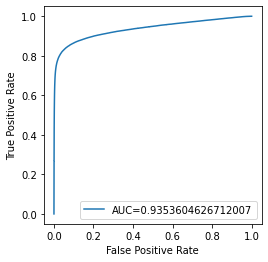

PRECISION RECALL CURVE:


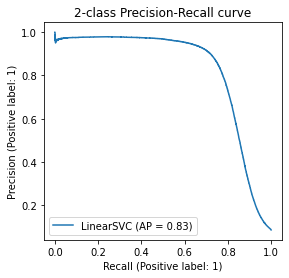

CONFUSION MATRIX:


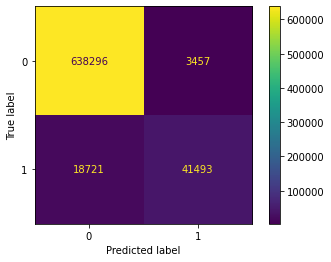

---------------------------------------
---------------------------------------
PERCENTAGE: 30.0% OF DATASET, NUMBER EMBEDDINGS: 406197
HYPERPARAMETERS: HIDDEN LAYER SIZES = (100,), ACTIVATION = relu, SOLVER = adam, ALPHA = 0.0001, LEARNING RATE = constant
RUNTIME IN SEC: 3755.648845434189
ACCURACY:
0.9668289250064461
AUC & ROC CURVE:


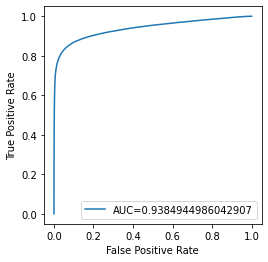

PRECISION RECALL CURVE:


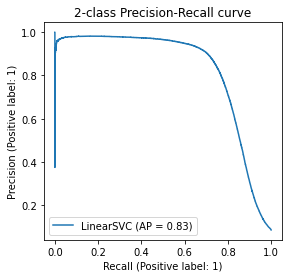

CONFUSION MATRIX:


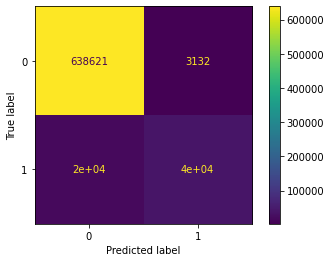

---------------------------------------
---------------------------------------
PERCENTAGE: 50.0% OF DATASET, NUMBER EMBEDDINGS: 676995
HYPERPARAMETERS: HIDDEN LAYER SIZES = (100,), ACTIVATION = relu, SOLVER = adam, ALPHA = 0.0001, LEARNING RATE = constant
RUNTIME IN SEC: 6722.4327981472015
ACCURACY:
0.9712507852933258
AUC & ROC CURVE:


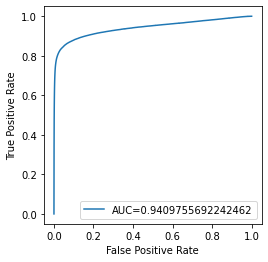

PRECISION RECALL CURVE:


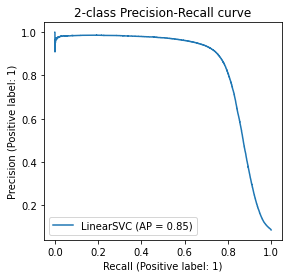

CONFUSION MATRIX:


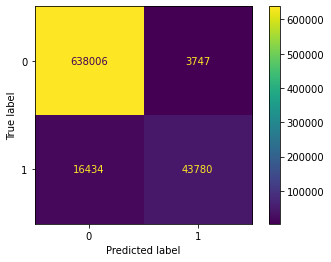

---------------------------------------
---------------------------------------
PERCENTAGE: 70.0% OF DATASET, NUMBER EMBEDDINGS: 947793
HYPERPARAMETERS: HIDDEN LAYER SIZES = (100,), ACTIVATION = relu, SOLVER = adam, ALPHA = 0.0001, LEARNING RATE = constant
RUNTIME IN SEC: 7318.470584392548
ACCURACY:
0.9698817750691984
AUC & ROC CURVE:


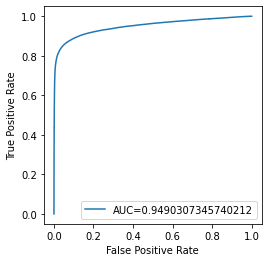

PRECISION RECALL CURVE:


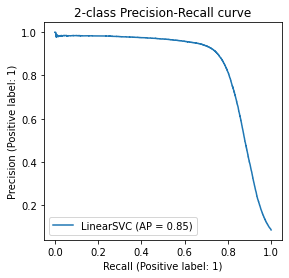

CONFUSION MATRIX:


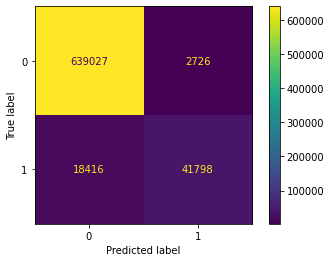

---------------------------------------
---------------------------------------
PERCENTAGE: 100% OF DATASET, NUMBER EMBEDDINGS: 1353990
HYPERPARAMETERS: HIDDEN LAYER SIZES = (100,), ACTIVATION = relu, SOLVER = adam, ALPHA = 0.0001, LEARNING RATE = constant
RUNTIME IN SEC: 6951.193809270859
ACCURACY:
0.9714829899411226
AUC & ROC CURVE:


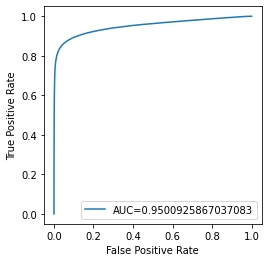

PRECISION RECALL CURVE:


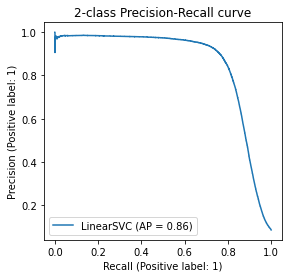

CONFUSION MATRIX:


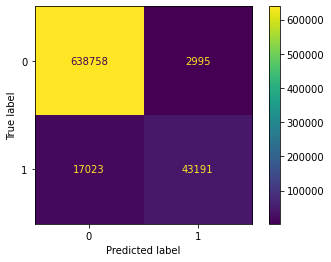

---------------------------------------


In [10]:
run_Percentage_MLP(embeddings_simclr_aggressive_train, classes_simclr_aggressive_train, embeddings_simclr_aggressive_test, classes_simclr_aggressive_test, [0.1, 0.3, 0.5, 0.7, 1], hidden_layer_sizes, activation, solver, alpha, learning_rate)